# vdW Parameter Estimation for R32 and EmimTF2N
*Fitting classical vdW mixing parameters

Bridgette Befort and Alex Dowling, University of Notre Dame, 2022

## Load Libraries and Data File

In [1]:
ipopt_path = '/Users/bridgettebefort/src/CoinIpopt/build/bin/ipopt'
# ipopt_path = "/Users/adowling/src/CoinIpopt/build/bin/ipopt"

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#load functions
from bip_regression_functions_vdw2param import *

In [4]:
#HFC32 critical T and P
Tc_HFC = 351.26 #[K]
Pc_HFC = 5.782 #[MPa]

In [5]:
#parameter bounds
bnds = ([-100.0,-100.0], [100.0,100.0])

## Mixtures

### R32/emimTF2N

#### Load Data

In [6]:
#Load Data
data_emimTF2N = pd.read_csv('r32_emimtf2n.csv')
data_emimTF2N

,Set,Measurement,T,P,x1
0,S1,m1,283.15,0.0102,0.014
1,S1,m2,283.15,0.1001,0.136
2,S1,m3,283.15,0.2503,0.306
3,S1,m4,283.15,0.3993,0.448
4,S1,m5,283.15,0.5493,0.570
5,S1,m6,283.15,0.7004,0.672
6,S1,m7,283.15,0.8494,0.786


#### Specify System Parameters

In [7]:
##BIP Dictionaries
#R32/emimTF2N
SP = SystemParameters(
    #Component Number
    ['HFC','IL'],

    #Critical temperature [K]
    {'HFC': 351.26, 'IL': 1000},

    # Critial pressure [MPa]
    {'HFC': 5.782, 'IL': 2.5},
     )

In [8]:
#Initialize fitted parameters
FP_init = FittedParameters(
    #k
    {('HFC','HFC'): 0,
    ('HFC','IL'): 0.9,     
    ('IL','HFC'): 1.0,
    ('IL','IL'): 0}
)

#### Model Exploration

In [9]:
#Initialize fitted parameters
FP_init_1 = FittedParameters(
    #k
    {('HFC','HFC'): 0,
    ('HFC','IL'): 0.9,     
    ('IL','HFC'): 1.0,
    ('IL','IL'): 0}
)

In [10]:
#Calculate fugacity intermediates given initial fitted parameter guesses
Scipy_results_1 = calculate_fugacity_detailed(FP_init_1, 
                                              SP,
                                              data_emimTF2N, 
                                              equilibrium=False) 
Scipy_results_1

{0: {'x1': 0.014,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},
  'a_mix': 1.1343961024165413e-05,
  'b_pure': {'HFC': 6.313506658595642e-05, 'IL': 0.0004157},
  'b_mix': 0.0004107640909322034,
  'alpha_l': -1.001779778909783,
  'beta_l': 0.020879097636697805,
  'gamma_l': -3.716017762909692e-05,
  'VL': 0.0004534204510774746,
  'A_star_L': 0.020879097636697805,
  'B_star_L': 0.0017797789097831,
  'Z_compressibility_L': 0.001964602490594103,
  'ln_phi_L': 10.074984294364024,
  'phi_L_HFC': 23741.605500282985,
  'alpha_v': -1.0002735547299726,
  'beta_v': 0.0011453286818627955,
  'gamma_v': -3.1331007829695557e-07,
  'VV': 0.23059365033873633,
  'A_star_V': 0.0011453286818627955,
  'B_star_V': 0.00027355472997269136,
  'Z_compressibility_V': 0.9991275397793207,
  'ln_phi_V': 0.0014151435492342928,
  'phi_V_HFC': 1.0014161453373691,
  'P': 0.0102,
  'residual': 5.80487120144791},
 1: {'x1': 0.136,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},
 

In [11]:
P1 = np.zeros(len(data_emimTF2N))
Res1 = np.zeros(len(data_emimTF2N))
Z_L1 = np.zeros(len(data_emimTF2N))
Z_V1 = np.zeros(len(data_emimTF2N))
for i in range(len(data_emimTF2N)):
    P1[i] = Scipy_results_1[i]['P']
    Res1[i] = Scipy_results_1[i]['residual']
    Z_L1[i] = Scipy_results_1[i]['Z_compressibility_L']
    Z_V1[i] = Scipy_results_1[i]['Z_compressibility_V']

In [12]:
#Initialize fitted parameters
FP_init_2 = FittedParameters(
    #k
    {('HFC','HFC'): 0,
    ('HFC','IL'): 0.1,     
    ('IL','HFC'): -0.1,
    ('IL','IL'): 0}
)

In [13]:
#Calculate fugacity intermediates given initial fitted parameter guesses
Scipy_results_2 = calculate_fugacity_detailed(FP_init_2, 
                                              SP,
                                              data_emimTF2N, 
                                              equilibrium=False) 
Scipy_results_2

{0: {'x1': 0.014,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},
  'a_mix': 1.1414622390535283e-05,
  'b_pure': {'HFC': 6.313506658595642e-05, 'IL': 0.0004157},
  'b_mix': 0.0004107640909322034,
  'alpha_l': -1.001779778909783,
  'beta_l': 0.021009153228782097,
  'gamma_l': -3.73916478289879e-05,
  'VL': 0.00045309575722172037,
  'A_star_L': 0.021009153228782097,
  'B_star_L': 0.0017797789097831,
  'Z_compressibility_L': 0.0019631956410438023,
  'ln_phi_L': 10.084596406913843,
  'phi_L_HFC': 23970.912782644373,
  'alpha_v': -1.0002735547299726,
  'beta_v': 0.0011453286818627955,
  'gamma_v': -3.1331007829695557e-07,
  'VV': 0.23059365033873633,
  'A_star_V': 0.0011453286818627955,
  'B_star_V': 0.00027355472997269136,
  'Z_compressibility_V': 0.9991275397793207,
  'ln_phi_V': 0.0014151435492342928,
  'phi_V_HFC': 1.0014161453373691,
  'P': 0.0102,
  'residual': 5.814483313997729},
 1: {'x1': 0.136,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},

In [14]:
P2 = np.zeros(len(data_emimTF2N))
Res2 = np.zeros(len(data_emimTF2N))
Z_L2 = np.zeros(len(data_emimTF2N))
Z_V2 = np.zeros(len(data_emimTF2N))
for i in range(len(data_emimTF2N)):
    P2[i] = Scipy_results_2[i]['P']
    Res2[i] = Scipy_results_2[i]['residual']
    Z_L2[i] = Scipy_results_2[i]['Z_compressibility_L']
    Z_V2[i] = Scipy_results_2[i]['Z_compressibility_V']

In [15]:
#Initialize fitted parameters
FP_init_3 = FittedParameters(
    #k
    {('HFC','HFC'): 0,
    ('HFC','IL'): 0.5,     
    ('IL','HFC'): 0.5,
    ('IL','IL'): 0}
)

In [16]:
#Calculate fugacity intermediates given initial fitted parameter guesses
Scipy_results_3 = calculate_fugacity_detailed(FP_init_3, 
                                              SP,
                                              data_emimTF2N, 
                                              equilibrium=False) 
Scipy_results_3

{0: {'x1': 0.014,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},
  'a_mix': 1.1377432197709036e-05,
  'b_pure': {'HFC': 6.313506658595642e-05, 'IL': 0.0004157},
  'b_mix': 0.0004107640909322034,
  'alpha_l': -1.001779778909783,
  'beta_l': 0.020940702917158785,
  'gamma_l': -3.726982140799265e-05,
  'VL': 0.00045326602341026127,
  'A_star_L': 0.020940702917158785,
  'B_star_L': 0.0017797789097831,
  'Z_compressibility_L': 0.00196393337878209,
  'ln_phi_L': 10.07929997159919,
  'phi_L_HFC': 23844.288019599997,
  'alpha_v': -1.0002735547299726,
  'beta_v': 0.0011453286818627955,
  'gamma_v': -3.1331007829695557e-07,
  'VV': 0.23059365033873633,
  'A_star_V': 0.0011453286818627955,
  'B_star_V': 0.00027355472997269136,
  'Z_compressibility_V': 0.9991275397793207,
  'ln_phi_V': 0.0014151435492342928,
  'phi_V_HFC': 1.0014161453373691,
  'P': 0.0102,
  'residual': 5.809186878683076},
 1: {'x1': 0.136,
  'a_pure': {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05},
 

In [17]:
P3 = np.zeros(len(data_emimTF2N))
Res3 = np.zeros(len(data_emimTF2N))
Z_L3 = np.zeros(len(data_emimTF2N))
Z_V3 = np.zeros(len(data_emimTF2N))
for i in range(len(data_emimTF2N)):
    P3[i] = Scipy_results_3[i]['P']
    Res3[i] = Scipy_results_3[i]['residual']
    Z_L3[i] = Scipy_results_3[i]['Z_compressibility_L']
    Z_V3[i] = Scipy_results_3[i]['Z_compressibility_V']

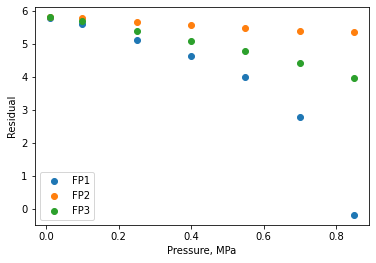

In [40]:
#Plot Residual
plt.scatter(P1,Res1,label='FP1')
plt.scatter(P2,Res2,label='FP2')
plt.scatter(P3,Res3,label='FP3')
plt.legend()
plt.xlabel('Pressure, MPa')
plt.ylabel('Residual')
plt.savefig('res.png')

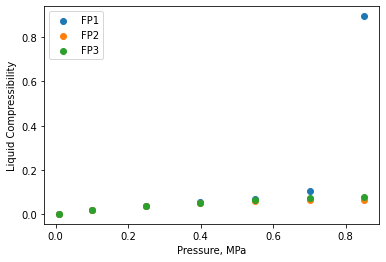

In [41]:
#Plot Liquid Compressibility
plt.scatter(P1,Z_L1,label='FP1')
plt.scatter(P2,Z_L2,label='FP2')
plt.scatter(P3,Z_L3,label='FP3')
plt.legend()
plt.xlabel('Pressure, MPa')
plt.ylabel('Liquid Compressibility')
plt.savefig('ZL.png')

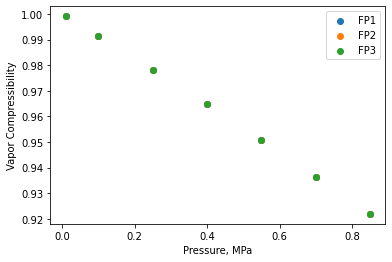

In [42]:
#Plot Vapor Compressibility
plt.scatter(P1,Z_V1,label='FP1')
plt.scatter(P2,Z_V2,label='FP2')
plt.scatter(P3,Z_V3,label='FP3')
plt.legend()
plt.xlabel('Pressure, MPa')
plt.ylabel('Vapor Compressibility')
plt.savefig('ZV.png')

In [25]:
P_FP1 = np.zeros(len(data_emimTF2N))
P_FP2 = np.zeros(len(data_emimTF2N))
P_FP3 = np.zeros(len(data_emimTF2N))

for i in range(len(data_emimTF2N)):
    
    try:
        result1 = calc_P(283.15,data_emimTF2N.iloc[i]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[i]["P"],verbose=False)
        
    except:
        result1 = np.nan
        
    P_FP1[i] = result1
    
    try:
        result2 = calc_P(283.15,data_emimTF2N.iloc[i]["x1"],FP_init_2,SP,2,P0=data_emimTF2N.iloc[i]["P"],verbose=False)
        
    except:
        result2 = np.nan
        
    P_FP2[i] = result2
    
    try:
        result3 = calc_P(283.15,data_emimTF2N.iloc[i]["x1"],FP_init_3,SP,2,P0=data_emimTF2N.iloc[i]["P"],verbose=False)
        
    except:
        result3 = np.nan
        
    P_FP3[i] = result3

x0 = -4.585367558691911
x_1 = -4.585e+00 - 1.000e+00 * 3.314e+02 / -3.322e+02 = -3.587818e+00,  f(x_1) = 1.217e+02
x_2 = -3.588e+00 - 1.000e+00 * 1.217e+02 / -1.225e+02 = -2.594506e+00,  f(x_2) = 4.455e+01
x_3 = -2.595e+00 - 1.000e+00 * 4.455e+01 / -4.538e+01 = -1.612857e+00,  f(x_3) = 1.616e+01
x_4 = -1.613e+00 - 1.000e+00 * 1.616e+01 / -1.703e+01 = -6.639107e-01,  f(x_4) = 5.692e+00
x_5 = -6.639e-01 - 1.000e+00 * 5.692e+00 / -6.667e+00 = 1.898292e-01,  f(x_5) = 1.776e+00
x_6 = 1.898e-01 - 1.000e+00 * 1.776e+00 / -3.086e+00 = 7.654776e-01,  f(x_6) = 2.429e-01
x_7 = 7.655e-01 - 1.000e+00 * 2.429e-01 / -2.576e+00 = 8.597657e-01,  f(x_7) = -9.687e-03
x_8 = 8.598e-01 - 1.000e+00 * -9.687e-03 / -2.818e+00 = 8.563282e-01,  f(x_8) = -2.278e-05
x_9 = 8.563e-01 - 1.000e+00 * -2.278e-05 / -2.805e+00 = 8.563201e-01,  f(x_9) = -2.769e-10
Converged!
It took 9 iterations
x0 = -4.585367558691911
x_1 = -4.585e+00 - 1.000e+00 * 3.346e+02 / -3.354e+02 = -3.587791e+00,  f(x_1) = 1.229e+02
x_2 = -3.588e+

x0 = -0.5991105386335623
x_1 = -5.991e-01 - 1.000e+00 * 5.781e+01 / -5.433e+01 = 4.650966e-01,  f(x_1) = 2.203e+01
x_2 = 4.651e-01 - 1.000e+00 * 2.203e+01 / -1.922e+01 = 1.611491e+00,  f(x_2) = -9.586e+01
x_2 = 4.651e-01 - 9.000e-01 * 2.203e+01 / -1.922e+01 = 1.496851e+00,  f(x_2) = -1.012e+02
x_2 = 4.651e-01 - 8.100e-01 * 2.203e+01 / -1.922e+01 = 1.393676e+00,  f(x_2) = -1.067e+02
x_2 = 4.651e-01 - 7.290e-01 * 2.203e+01 / -1.922e+01 = 1.300818e+00,  f(x_2) = -1.122e+02
x_2 = 4.651e-01 - 6.561e-01 * 2.203e+01 / -1.922e+01 = 1.217246e+00,  f(x_2) = -1.176e+02
x_2 = 4.651e-01 - 5.905e-01 * 2.203e+01 / -1.922e+01 = 1.142031e+00,  f(x_2) = -1.229e+02
x_2 = 4.651e-01 - 5.314e-01 * 2.203e+01 / -1.922e+01 = 1.074337e+00,  f(x_2) = 1.262e+01
x_3 = 1.074e+00 - 1.000e+00 * 1.262e+01 / -1.538e+01 = 1.894797e+00,  f(x_3) = -8.552e+01
x_3 = 1.074e+00 - 9.000e-01 * 1.262e+01 / -1.538e+01 = 1.812751e+00,  f(x_3) = -8.812e+01
x_3 = 1.074e+00 - 8.100e-01 * 1.262e+01 / -1.538e+01 = 1.738909e+00,  f(x_3)

x_2 = 6.906e-01 - 8.595e-04 * 9.387e+01 / -8.328e+01 = 6.915711e-01,  f(x_2) = 9.379e+01
x_2 = 6.906e-01 - 7.736e-04 * 9.387e+01 / -8.328e+01 = 6.914742e-01,  f(x_2) = 9.380e+01
x_2 = 6.906e-01 - 6.962e-04 * 9.387e+01 / -8.328e+01 = 6.913871e-01,  f(x_2) = 9.380e+01
x_2 = 6.906e-01 - 6.266e-04 * 9.387e+01 / -8.328e+01 = 6.913086e-01,  f(x_2) = 9.381e+01
x_2 = 6.906e-01 - 5.639e-04 * 9.387e+01 / -8.328e+01 = 6.912380e-01,  f(x_2) = 9.381e+01
x_2 = 6.906e-01 - 5.075e-04 * 9.387e+01 / -8.328e+01 = 6.911744e-01,  f(x_2) = 9.382e+01
x_2 = 6.906e-01 - 4.568e-04 * 9.387e+01 / -8.328e+01 = 6.911172e-01,  f(x_2) = 9.383e+01
x_2 = 6.906e-01 - 4.111e-04 * 9.387e+01 / -8.328e+01 = 6.910657e-01,  f(x_2) = 9.383e+01
x_2 = 6.906e-01 - 3.700e-04 * 9.387e+01 / -8.328e+01 = 6.910194e-01,  f(x_2) = 9.383e+01
x_2 = 6.906e-01 - 3.330e-04 * 9.387e+01 / -8.328e+01 = 6.909777e-01,  f(x_2) = 9.384e+01
x_2 = 6.906e-01 - 2.997e-04 * 9.387e+01 / -8.328e+01 = 6.909401e-01,  f(x_2) = 9.384e+01
x_2 = 6.906e-01 - 2.6

In [26]:
P_FP1

array([2.35448044,        nan,        nan,        nan,        nan,
              nan, 2.01991025])

In [27]:
P_FP2

array([2.36683638,        nan,        nan,        nan,        nan,
              nan,        nan])

In [28]:
P_FP3

array([2.36000841,        nan,        nan,        nan,        nan,
              nan,        nan])

In [29]:
# Point 1
calc_P(283.15,data_emimTF2N.iloc[0]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[0]["P"],verbose=True)



P= 0.010200000000000006
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.014, 'IL': 0.986}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.1343961024165413e-05
mixture b = 0.0004107640909322034
Q 0.10454727028027117
R -0.03376767953479351
M -2.459254284796356e-06
Z [0.001964602490594103, 0.9805246275439929, 0.01929054887519599]
Q 0.11079013313850522
R -0.036876656645528944
M -5.432880887789454e-10
Z [0.0004515418456443321, 0.9991275397793207, 0.0006944731050074759]
A_star_L =  0.020879097636697812
B_star_L =  0.0017797789097831014
V_L =  0.00045342045107747437
Z_compressibility_L =  0.001964602490594103
A_star_V =  0.0011453286818627962
B_star_V =  0.0002735547299726916
V_V =  0.23059365033873622
Z_compressibility_V =  0.9991275397793207
alpha_l: -1.001779778909783
beta_l: 0.020879097636697812
gamma_l: -3.716017762909696e-05
alpha_v: -1.0002735547299726
beta_v: 0.0011453286818627962
gamma_

2.3544804360113805

In [30]:
# Point 2
calc_P(283.15,data_emimTF2N.iloc[1]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[1]["P"],verbose=True)



P= 0.10009999999999998
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.136, 'IL': 0.864}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 8.750623449036658e-06
mixture b = 0.0003677511690556901
Q 0.06192681961647321
R -0.013282490491838397
M -6.106052585803083e-05
Z [0.01759130141735127, 0.8284492140498692, 0.16959677679866236]
Q 0.1079618405824916
R -0.03547286109498204
M -5.3323132821140456e-08
Z [0.0044186049568982755, 0.9913775933001323, 0.006888392769466123]
A_star_L =  0.1580592442976386
B_star_L =  0.01563729226588291
V_L =  0.00041370472275154365
Z_compressibility_L =  0.01759130141735127
A_star_V =  0.01123994127984959
B_star_V =  0.002684591026496706
V_V =  0.023314795343895512
Z_compressibility_V =  0.9913775933001323
alpha_l: -1.015637292265883
beta_l: 0.1580592442976386
gamma_l: -0.0024716185984067613
alpha_v: -1.0026845910264968
beta_v: 0.01123994127984959
gamma_v: -3.017464549

R 0.005592588443527169
M 3.1279735735025546e-05
Z 0.14816635983531343
A_star_L =  5.69714299062294
B_star_L =  0.563636062039733
V_L =  0.0004100526667536776
Z_compressibility_L =  0.6284697093184067
A_star_V =  0.40513639655852274
B_star_V =  0.09676434312500033
V_V =  9.667293438779553e-05
Z_compressibility_V =  0.14816635983531343
alpha_l: -1.5636360620397332
beta_l: 5.69714299062294
gamma_l: -3.2111152401119814
alpha_v: -1.0967643431250003
beta_v: 0.40513639655852274
gamma_v: -0.0392027572890151
B =  {'HFC': 0.09676434312500033, 'IL': 0.6371251289059409}
V_L =  0.0004100526667536776
corresponding pressure: 3.608039604994417

V_V =  9.667293438779553e-05
corresponding pressure: 3.6080396049943744
ln(x)+lnphi_L - lnphi_V =  -2.605920963979767
x_5 = 1.130e+00 - 5.314e-01 * 7.867e+00 / -2.727e+01 = 1.283165e+00,  f(x_5) = -1.169e+02


P= 3.553138246561512
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.136, 'IL': 0.864}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.166443807

V_L =  0.0004104798691514293
corresponding pressure: 3.159911860689121

V_V =  9.73229703576088e-05
corresponding pressure: 3.1599118606891636
ln(x)+lnphi_L - lnphi_V =  -2.575985865477969
x_5 = 1.130e+00 - 7.179e-02 * 7.867e+00 / -2.727e+01 = 1.150544e+00,  f(x_5) = -1.260e+02


P= 3.1533734818224453
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.136, 'IL': 0.864}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 8.750623449036658e-06
mixture b = 0.0003677511690556901
Q -1.4121970840965143
R -0.11089538210470057
M 2.828643284019875
Z 0.5498539691314217
Q 0.0126715196353525
R 0.0017813337397652594
M 1.1385168054717877e-06
Z 0.13037914964071776
A_star_L =  4.979219076174516
B_star_L =  0.49260961796945435
V_L =  0.00041048617928229365
Z_compressibility_L =  0.5498539691314217
A_star_V =  0.3540832444467446
B_star_V =  0.0845706109140181
V_V =  9.733282289229238e-05
Z_compressibility_V =  0.1303

Z 0.5411237193335707
Q 0.014233481036071336
R 0.0013307653413977096
M -1.1126527457449495e-06
Z [0.12839450415974224, 0.5231949325359769, 0.43162852976981586]
A_star_L =  4.899580145245949
B_star_L =  0.48473069102528016
V_L =  0.00041053493016456294
Z_compressibility_L =  0.5411237193335707
A_star_V =  0.3484199445163623
B_star_V =  0.08321796646553506
V_V =  0.0003969328776710032
Z_compressibility_V =  0.5231949325359769
alpha_l: -1.4847306910252802
beta_l: 4.899580145245949
gamma_l: -2.3749768695388114
alpha_v: -1.083217966465535
beta_v: 0.3484199445163623
gamma_v: -0.028994799258686227
B =  {'HFC': 0.08321796646553506, 'IL': 0.5479317680393141}
V_L =  0.00041053493016456294
corresponding pressure: 3.10293760240679

V_V =  0.0003969328776710032
corresponding pressure: 3.1029376024066364
ln(x)+lnphi_L - lnphi_V =  1.3474021925341273
x_5 = 1.130e+00 - 8.728e-03 * 7.867e+00 / -2.727e+01 = 1.132349e+00,  f(x_5) = 7.795e+00


P= 3.102156310430461
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fraction

gamma_v: -0.0288687695665925
B =  {'HFC': 0.0830369106108562, 'IL': 0.5467396426031663}
V_L =  0.0004105414658149349
corresponding pressure: 3.0961865960618695

V_V =  0.0004021729123612355
corresponding pressure: 3.096186596061733
ln(x)+lnphi_L - lnphi_V =  1.3654828113831803
x_5 = 1.130e+00 - 1.179e-03 * 7.867e+00 / -2.727e+01 = 1.130171e+00,  f(x_5) = 7.858e+00


P= 3.0960812732554936
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.136, 'IL': 0.864}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 8.750623449036658e-06
mixture b = 0.0003677511690556901
Q -1.385001762957498
R -0.09433120854982807
M 2.665650147166825
Z 0.5399367684145961
Q 0.014445847806361798
R 0.0012690860673399583
M -1.4040164607604556e-06
Z [0.12812452403323094, 0.5290332062092389, 0.425876355706443]
A_star_L =  4.888753909438901
B_star_L =  0.48365961787036005
V_L =  0.0004105415677970488
Z_compressibility_L =  0.5399367

B_star_L =  0.48352956184053214
V_L =  0.0004105423739468014
Z_compressibility_L =  0.5397926394121337
A_star_V =  0.34755658395006156
B_star_V =  0.08301175809031185
V_V =  0.00040286509164244957
Z_compressibility_V =  0.5296983330954972
alpha_l: -1.4835295618405322
beta_l: 4.887439323931293
gamma_l: -2.3632213948226846
alpha_v: -1.0830117580903118
beta_v: 0.34755658395006156
gamma_v: -0.02885128306955767
B =  {'HFC': 0.08301175809031185, 'IL': 0.5465740309493631}
V_L =  0.0004105423739468014
corresponding pressure: 3.0952487372664237

V_V =  0.00040286509164244957
corresponding pressure: 3.0952487372662443
ln(x)+lnphi_L - lnphi_V =  1.367843888825766
x_5 = 1.130e+00 - 1.290e-04 * 7.867e+00 / -2.727e+01 = 1.129868e+00,  f(x_5) = 7.866e+00


P= 3.0952372162675412
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.136, 'IL': 0.864}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 8.750623449036658

Q -1.384567190679823
R -0.09407120137922576
M 2.6631011172041013
Z 0.5397783274585481
Q 0.014474195819408564
R 0.0012608451510345306
M -1.4426474657473178e-06
Z [0.12808848280587593, 0.5297639249561203, 0.42515713318510107]
A_star_L =  4.887308786364295
B_star_L =  0.4835166473533353
V_L =  0.00041054245399899754
Z_compressibility_L =  0.5397783274585481
A_star_V =  0.3475473011359219
B_star_V =  0.08300954094709738
V_V =  0.0004029257395635775
Z_compressibility_V =  0.5297639249561203
alpha_l: -1.4835166473533352
beta_l: 4.887308786364295
gamma_l: -2.3630951589633624
alpha_v: -1.0830095409470974
beta_v: 0.3475473011359219
gamma_v: -0.028849741924695495
B =  {'HFC': 0.08300954094709738, 'IL': 0.5465594326209839}
V_L =  0.00041054245399899754
corresponding pressure: 3.09516606693294

V_V =  0.0004029257395635775
corresponding pressure: 3.0951660669326304
ln(x)+lnphi_L - lnphi_V =  1.3680504649459455
x_5 = 1.130e+00 - 3.644e-05 * 7.867e+00 / -2.727e+01 = 1.129842e+00,  f(x_5) = 7.867e+00

mixture b = 0.0003677511690556901
Q -1.384555667740489
R -0.09406430913953104
M 2.663033551747128
Z 0.5397741263174389
Q 0.014474947481423639
R 0.001260626614609443
M -1.4436709485705014e-06
Z [0.12808752714592, 0.529783163453851, 0.42513819952567]
A_star_L =  4.887270468282265
B_star_L =  0.4835128564263925
V_L =  0.0004105424774976401
Z_compressibility_L =  0.5397741263174389
A_star_V =  0.34754457625264235
B_star_V =  0.08300889012544105
V_V =  0.0004029435311113286
Z_compressibility_V =  0.529783163453851
alpha_l: -1.4835128564263926
beta_l: 4.887270468282265
gamma_l: -2.363058104247511
alpha_v: -1.083008890125441
beta_v: 0.34754457625264235
gamma_v: -0.028849289543848557
B =  {'HFC': 0.08300889012544105, 'IL': 0.546555147418209}
V_L =  0.0004105424774976401
corresponding pressure: 3.0951417998292783

V_V =  0.0004029435311113286
corresponding pressure: 3.0951417998293165
ln(x)+lnphi_L - lnphi_V =  1.3681110565748253
x_5 = 1.130e+00 - 9.261e-06 * 7.867e+00 / -2.727e+01 = 1.129834e+

mixture b = 0.0003677511690556901
Q -1.3845527387778072
R -0.09406255724947966
M 2.663016377790024
Z 0.5397730584489158
Q 0.014475138542898329
R 0.0012605710656507323
M -1.4439310960147701e-06
Z [0.12808728423108717, 0.5297880524870845, 0.42513338797794975]
A_star_L =  4.887260728387821
B_star_L =  0.48351189282836465
V_L =  0.00041054248347065523
Z_compressibility_L =  0.5397730584489158
A_star_V =  0.34754388362727817
B_star_V =  0.08300872469612153
V_V =  0.0004029480526614941
Z_compressibility_V =  0.5297880524870845
alpha_l: -1.4835118928283646
beta_l: 4.887260728387821
gamma_l: -2.3630486855285273
alpha_v: -1.0830087246961215
beta_v: 0.34754388362727817
gamma_v: -0.02884917455583763
B =  {'HFC': 0.08300872469612153, 'IL': 0.5465540581825141}
V_L =  0.00041054248347065523
corresponding pressure: 3.095135631487537

V_V =  0.0004029480526614941
corresponding pressure: 3.0951356314875778
ln(x)+lnphi_L - lnphi_V =  1.368126454694031
x_5 = 1.130e+00 - 2.354e-06 * 7.867e+00 / -2.727e+01

AssertionError: 

In [31]:
# Point 3
calc_P(283.15,data_emimTF2N.iloc[2]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[2]["P"],verbose=True)



P= 0.2503
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 'IL': 0.694}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 5.733495015752011e-06
mixture b = 0.00030781513037530264
Q 0.032184202913832075
R -0.00045946511598102876
M -3.3126026757117526e-05
Z [0.03838635066567714, 0.6596255803092541, 0.33471642776296173]
Q 0.10323936625626348
R -0.03316656822145102
M -3.4178049194435144e-07
Z [0.010998103807228654, 0.978177515702425, 0.017537199011146698]
A_star_L =  0.2589566789056579
B_star_L =  0.03272835873789293
V_L =  0.0003610293943981686
Z_compressibility_L =  0.03838635066567714
A_star_V =  0.02810546755590762
B_star_V =  0.006712818520800456
V_V =  0.009199906476749786
Z_compressibility_V =  0.978177515702425
alpha_l: -1.032728358737893
beta_l: 0.2589566789056579
gamma_l: -0.008475227084797723
alpha_v: -1.0067128185208005
beta_v: 0.02810546755590762
gamma_v: -0.000188666903145053
B 

B_star_V =  0.06158989007147136
V_V =  0.0007621399438054936
Z_compressibility_V =  0.7434872234457884
alpha_l: -1.30028161950759
beta_l: 2.3759190476627032
gamma_l: -0.7134448194510871
alpha_v: -1.0615898900714713
beta_v: 0.2578667443208705
gamma_v: -0.015881984435810625
B =  {'HFC': 0.06158989007147136, 'IL': 0.40552609963360176}
V_L =  0.0003578206813322511
corresponding pressure: 2.296494302225206

V_V =  0.0007621399438054936
corresponding pressure: 2.2964943022250877
ln(x)+lnphi_L - lnphi_V =  2.6251169172535027
x_3 = 6.567e-01 - 1.668e-01 * 2.428e+01 / -2.318e+01 = 8.313837e-01,  f(x_3) = 2.052e+01


P= 2.2567163575552156
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 'IL': 0.694}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 5.733495015752011e-06
mixture b = 0.00030781513037530264
Q -0.5918958774403479
R 0.07902966471509913
M 0.21361092153213157
Z 0.3430724008169636
Q 0.040500

k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 'IL': 0.694}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 5.733495015752011e-06
mixture b = 0.00030781513037530264
Q -0.5035690412660776
R 0.09103149277066025
M 0.13598266617159735
Z 0.2997964687589003
Q 0.04943520526228921
R -0.010254216594145212
M -1.5662750306266038e-05
Z [0.08311161881875201, 0.7922752351267548, 0.17743956755983348]
A_star_L =  2.037855578711846
B_star_L =  0.25755531279575916
V_L =  0.00035829930322678143
Z_compressibility_L =  0.2997964687589003
A_star_V =  0.22117554215304597
B_star_V =  0.05282642150534053
V_V =  0.0009468812821075736
Z_compressibility_V =  0.7922752351267548
alpha_l: -1.257555312795759
beta_l: 2.037855578711846
gamma_l: -0.5248605310077122
alpha_v: -1.0528264215053404
beta_v: 0.22117554215304597
gamma_v: -0.011683912416449019
B =  {'HFC': 0.05282642150534053, 'IL': 0.3478248239411023}
V_L =  0.0003582

Q 0.050461805290196726
R -0.010632896400240791
M -1.543714192363156e-05
Z [0.08177297142488638, 0.7967982974108592, 0.1733714847177099]
A_star_L =  2.003766809982819
B_star_L =  0.2532469881114474
V_L =  0.0003583482233082893
Z_compressibility_L =  0.2948217916944668
A_star_V =  0.21747576971395188
B_star_V =  0.051942753553455574
V_V =  0.0009684876160991396
Z_compressibility_V =  0.7967982974108592
alpha_l: -1.2532469881114474
beta_l: 2.003766809982819
gamma_l: -0.507447909505832
alpha_v: -1.0519427535534556
beta_v: 0.21747576971395188
gamma_v: -0.01129629031009986
B =  {'HFC': 0.051942753553455574, 'IL': 0.34200649210963974}
V_L =  0.0003583482233082893
corresponding pressure: 1.9367827648167975

V_V =  0.0009684876160991396
corresponding pressure: 1.9367827648168898
ln(x)+lnphi_L - lnphi_V =  2.880349859609548
x_3 = 6.567e-01 - 4.175e-03 * 2.428e+01 / -2.318e+01 = 6.610282e-01,  f(x_3) = 2.418e+01


P= 1.9359358506238884
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 

pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 5.733495015752011e-06
mixture b = 0.00030781513037530264
Q -0.4912830643277936
R 0.09207906490166132
M 0.12705416753420576
Z 0.2937815259268359
Q 0.050676468735556424
R -0.010712369336580353
M -1.5387609764718353e-05
Z [0.08149291238874828, 0.7977362677015616, 0.1725288161864743]
A_star_L =  1.9966395309386678
B_star_L =  0.2523462036776655
V_L =  0.00035835846700723743
Z_compressibility_L =  0.2937815259268359
A_star_V =  0.21670222137071612
B_star_V =  0.05175799627678413
V_V =  0.0009730889138372914
Z_compressibility_V =  0.7977362677015616
alpha_l: -1.2523462036776656
beta_l: 1.9966395309386678
gamma_l: -0.5038444057451276
alpha_v: -1.0517579962767842
beta_v: 0.21670222137071612
gamma_v: -0.011216072766876375
B =  {'HFC': 0.05175799627678413, 'IL': 0.3407899954135009}
V_L =  0.00035835846700723743
corresponding pressure: 1.9298937440267352

V_V =  0



P= 1.9285012808257473
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 'IL': 0.694}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 5.733495015752011e-06
mixture b = 0.00030781513037530264
Q -0.490853524308928
R 0.09211295496611047
M 0.1267496615546117
Z 0.2935712524578053
Q 0.05071985912530758
R -0.0107284455780692
M -1.5377501521212145e-05
Z [0.08143629727889312, 0.7979255392069329, 0.1723588151934167]
A_star_L =  1.9951989091008508
B_star_L =  0.25216413002537374
V_L =  0.0003583605381964805
Z_compressibility_L =  0.2935712524578053
A_star_V =  0.21654586568028097
B_star_V =  0.05172065167924282
V_V =  0.000974022569570268
Z_compressibility_V =  0.7979255392069329
alpha_l: -1.2521641300253736
beta_l: 1.9951989091008508
gamma_l: -0.5031175971409908
alpha_v: -1.0517206516792428
beta_v: 0.21654586568028097
gamma_v: -0.011199893291429914
B =  {'HFC': 0.05172065167924282, 'IL': 0.34054410

A_star_L =  1.99504588169855
B_star_L =  0.25214478958688646
V_L =  0.00035836075821763224
Z_compressibility_L =  0.29354891641230335
A_star_V =  0.21652925708494095
B_star_V =  0.05171668481812651
V_V =  0.000974121816999482
Z_compressibility_V =  0.7979456379543748
alpha_l: -1.2521447895868865
beta_l: 1.99504588169855
gamma_l: -0.5030404240570653
alpha_v: -1.0517166848181265
beta_v: 0.21652925708494095
gamma_v: -0.011198175342564978
B =  {'HFC': 0.05171668481812651, 'IL': 0.3405179885195098}
V_L =  0.00035836075821763224
corresponding pressure: 1.9283533689859595

V_V =  0.000974121816999482
corresponding pressure: 1.928353368985984
ln(x)+lnphi_L - lnphi_V =  2.886419863269726
x_3 = 6.567e-01 - 1.143e-05 * 2.428e+01 / -2.318e+01 = 6.566665e-01,  f(x_3) = 2.428e+01


P= 1.9283510589414101
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.306, 'IL': 0.694}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mi

AssertionError: 

In [32]:
# Point 4
calc_P(283.15,data_emimTF2N.iloc[3]["x1"],FP_init_1,SP,1,P0=data_emimTF2N.iloc[3]["P"],verbose=True)



P= 0.3993
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.448, 'IL': 0.552}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 3.7457197599758224e-06
mixture b = 0.0002577509098305085
Q 0.031076659818298005
R -0.00106217670372334
M -2.888433789240941e-05
Z [0.05467378871219419, 0.6640542893814076, 0.3249911948556942]
Q 0.09855818423521481
R -0.030927038599636324
M -8.844630291656146e-07
Z [0.017469365386410918, 0.964750274865082, 0.028489222854202745]
A_star_L =  0.26988666078704177
B_star_L =  0.043719272949296215
V_L =  0.0003223342437737381
Z_compressibility_L =  0.05467378871219419
A_star_V =  0.04483624928115825
B_star_V =  0.010708863105695654
V_V =  0.005687772104401179
Z_compressibility_V =  0.964750274865082
alpha_l: -1.0437192729492961
beta_l: 0.26988666078704177
gamma_l: -0.011799248588322798
alpha_v: -1.0107088631056957
beta_v: 0.04483624928115825
gamma_v: -0.0004801452557247689
B 

k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.448, 'IL': 0.552}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 3.7457197599758224e-06
mixture b = 0.0002577509098305085
Q -0.7630148478890356
R -0.113441632663006
M 0.4570898834680201
Z 0.5956354363062795
Q -0.028351662576360015
R 0.011655350293358492
M 0.00015863673232107382
Z 0.18190809011164055
A_star_L =  3.029887947834097
B_star_L =  0.4908152845007223
V_L =  0.00031279705519237863
Z_compressibility_L =  0.5956354363062795
A_star_V =  0.5033550414344493
B_star_V =  0.1202232639595145
V_V =  9.55287604368329e-05
Z_compressibility_V =  0.18190809011164055
alpha_l: -1.4908152845007223
beta_l: 3.029887947834097
gamma_l: -1.487115315121502
alpha_v: -1.1202232639595144
beta_v: 0.5033550414344493
gamma_v: -0.06051498601172616
B =  {'HFC': 0.1202232639595145, 'IL': 0.791585620012427}
V_L =  0.00031279705519237863
corresponding pressure: 4.48274936613042

V_V 

3163396.617976442

In [33]:
# Point 5
calc_P(283.15,data_emimTF2N.iloc[4]["x1"],FP_init_1,SP,1,P0=data_emimTF2N.iloc[4]["P"],verbose=True)



P= 0.5493
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.00021473798795399517
Q 0.042404814243638816
R -0.006842539189243471
M -2.9430648955818236e-05
Z [0.07019335749842476, 0.7516447322932742, 0.228268159227571]
Q 0.09384916921569517
R -0.02872112233233531
M -1.6893215882776312e-06
Z [0.02393231528240669, 0.9508705327215196, 0.03992887877783813]
A_star_L =  0.240359935345524
B_star_L =  0.050106249019269994
V_L =  0.00030082436127179123
Z_compressibility_L =  0.07019335749842476
A_star_V =  0.06167931813208171
B_star_V =  0.014731726781764645
V_V =  0.0040751009903542265
Z_compressibility_V =  0.9508705327215196
alpha_l: -1.05010624901927
beta_l: 0.240359935345524
gamma_l: -0.01204353477467846
alpha_v: -1.0147317267817646
beta_v: 0.06167931813208171
gamma_v: -0.000908642862

B =  {'HFC': 0.05160369472298554, 'IL': 0.33977402822786806}
V_L =  0.00029252858330159655
corresponding pressure: 1.9241403218544164

V_V =  0.0009769545212649148
corresponding pressure: 1.9241403218544173
ln(x)+lnphi_L - lnphi_V =  2.642063980893758


P= 6.079719832174075
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.00021473798795399517
Q -0.6182526955794734
R -0.18755029168355147
M 0.2714937938334791
Z 0.7162427558199082
Q -0.07725905956553958
R 0.0184065584569937
M 0.0007999578069482606
Z 0.2421528086126597
A_star_L =  2.6603332710363383
B_star_L =  0.5545821151980859
V_L =  0.0002773340936471703
Z_compressibility_L =  0.7162427558199082
A_star_V =  0.6826742648508853
B_star_V =  0.16305256049019565
V_V =  9.376322364870755e-05
Z_compressibility_V =  0.2421528086126597
al

A_star_V =  0.007838616856559667
B_star_V =  0.0018722055524428413
V_V =  0.03351999879528223
Z_compressibility_V =  0.9940011352797731
alpha_l: -1.0063678344715217
beta_l: 0.03054653484992128
gamma_l: -0.00019451527760286892
alpha_v: -1.001872205552443
beta_v: 0.007838616856559667
gamma_v: -1.4675502002323058e-05
B =  {'HFC': 0.0018722055524428413, 'IL': 0.012327156527044934}
V_L =  0.00030452272210187455
corresponding pressure: 0.06980868741292312

V_V =  0.03351999879528223
corresponding pressure: 0.06980868741265546
ln(x)+lnphi_L - lnphi_V =  6.056720684186636


P= 0.06980869439352454
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.00021473798795399517
Q 0.10234851175853914
R -0.03272283810319224
M -1.3388247066144481e-06
Z [0.009030309444470752, 0.9752506168686264, 0.022086

M -1.1718022168913378e-11
Z [2.585286092787742e-05, 0.9999309072181479, 6.143540292669059e-05]
Q 0.11110483389097855
R -0.03703389846850137
M -2.072959859322765e-13
Z [8.833252306938988e-06, 0.9999829512845202, 1.3565112662983214e-05]
A_star_L =  8.728382114669118e-05
B_star_L =  1.8195482002616437e-05
V_L =  0.00030510823168677573
Z_compressibility_L =  2.585286092787742e-05
A_star_V =  2.2398102930720985e-05
B_star_V =  5.349649490265644e-06
V_V =  11.801519020834839
Z_compressibility_V =  0.9999829512845202
alpha_l: -1.0000181954820027
beta_l: 8.728382114669118e-05
gamma_l: -1.5881711967942114e-09
alpha_v: -1.0000053496494903
beta_v: 2.2398102930720985e-05
gamma_v: -1.1982199992624894e-10
B =  {'HFC': 5.349649490265644e-06, 'IL': 3.522367858875586e-05}
V_L =  0.00030510823168677573
corresponding pressure: 0.0001997689017869675

V_V =  11.801519020834839
corresponding pressure: 0.00019947169184812442
ln(x)+lnphi_L - lnphi_V =  11.91323650941897


P= 0.0001994716918481244
k = 0
k = 0.

A_star_L =  0.004291088397161607
B_star_L =  0.0008945348711414666
V_L =  0.00030502660484676535
Z_compressibility_L =  0.0012706505134982282
A_star_V =  0.0011011461040748864
B_star_V =  0.00026300199229339807
V_V =  0.2398541155708157
Z_compressibility_V =  0.9991612215853318
alpha_l: -1.0008945348711416
beta_l: 0.004291088397161607
gamma_l: -3.8385282064116e-06
alpha_v: -1.0002630019922933
beta_v: 0.0011011461040748864
gamma_v: -2.8960361917780857e-07
B =  {'HFC': 0.00026300199229339807, 'IL': 0.0017316831058935575}
V_L =  0.00030502660484676535
corresponding pressure: 0.00980652157437234

V_V =  0.2398541155708157
corresponding pressure: 0.009806521428675215
ln(x)+lnphi_L - lnphi_V =  8.01830753303586


P= 0.00980652240932741
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.0

B_star_V =  0.01492022214586052
V_V =  0.004020826125065936
Z_compressibility_V =  0.9502107503788975
alpha_l: -1.0507473684068531
beta_l: 0.2434353883591583
gamma_l: -0.01235370533632755
alpha_v: -1.0149202221458604
beta_v: 0.06246851723282009
gamma_v: -0.0009320441542361919
B =  {'HFC': 0.01492022214586052, 'IL': 0.09823916693886639}
V_L =  0.00030077403011982804
corresponding pressure: 0.5563284023747777

V_V =  0.004020826125065936
corresponding pressure: 0.5563284023748003
ln(x)+lnphi_L - lnphi_V =  3.981580111179839


P= 1.613743455476005
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.00021473798795399517
Q -0.08914738321778842
R 0.02712190840511606
M 0.0014440749858652827
Z 0.20165527178517464
Q 0.060535945166919417
R -0.014470614011872728
M -1.2441394565473201e-05
Z [0.

Z 0.7022996618693422
Q -0.07342635590575185
R 0.01807795541568621
M 0.000722685511058979
Z 0.2374691363846923
A_star_L =  2.6053601033526967
B_star_L =  0.5431222218286897
V_L =  0.00027767307296471086
Z_compressibility_L =  0.7022996618693422
A_star_V =  0.6685674733283574
B_star_V =  0.15968323986910563
V_V =  9.388981429764802e-05
Z_compressibility_V =  0.2374691363846923
alpha_l: -1.5431222218286897
beta_l: 2.6053601033526967
gamma_l: -1.4150289679967414
alpha_v: -1.1596832398691057
beta_v: 0.6685674733283574
gamma_v: -0.10675902021217397
B =  {'HFC': 0.15968323986910563, 'IL': 1.051401802565813}
V_L =  0.00027767307296471086
corresponding pressure: 5.954088407930236

V_V =  9.388981429764802e-05
corresponding pressure: 5.954088407930257
ln(x)+lnphi_L - lnphi_V =  -2.3179904498043955


P= 5.954089003339069
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506

corresponding pressure: 6.829793442147768

V_V =  9.304373623266184e-05
corresponding pressure: 6.82979344214786
ln(x)+lnphi_L - lnphi_V =  -2.3298692928836457


P= 6.829794125127168
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 2.4249659885313577e-06
mixture b = 0.00021473798795399517
Q -0.7035003756953991
R -0.28087428641142625
M 0.4270616904511917
Z 0.7990293583466073
Q -0.10008947507055166
R 0.01964776674761213
M 0.001388721392737916
Z 0.269940572766505
A_star_L =  2.9885470131782372
B_star_L =  0.6230026673656819
V_L =  0.0002754112714365143
Z_compressibility_L =  0.7990293583466073
A_star_V =  0.7668979512476631
B_star_V =  0.18316887134002316
V_V =  9.304373560411082e-05
Z_compressibility_V =  0.269940572766505
alpha_l: -1.6230026673656819
beta_l: 2.9885470131782372
gamma_l: -1.8618727607577834
alpha_v: -1

mixture b = 0.00021473798795399517
Q -1.6148198249232262
R -2.592987450960059
M 10.934457641695158
Z 1.7183441636644108
Q -0.3578932919140098
R -0.056451025360630465
M 0.049028414086878136
Z 0.576135180049851
A_star_L =  6.788924584443356
B_star_L =  1.4152422919908119
V_L =  0.0002607283363463687
Z_compressibility_L =  1.7183441636644108
A_star_V =  1.7421216169685168
B_star_V =  0.416095061667635
V_V =  8.741832409444484e-05
Z_compressibility_V =  0.576135180049851
alpha_l: -2.415242291990812
beta_l: 6.788924584443356
gamma_l: -9.607973189040385
alpha_v: -1.4160950616676349
beta_v: 1.7421216169685168
gamma_v: -0.724888201645035
B =  {'HFC': 0.416095061667635, 'IL': 2.739693271721535}
V_L =  0.0002607283363463687
corresponding pressure: 15.514882997759067

V_V =  8.741832409444484e-05
corresponding pressure: 15.514882997759145
ln(x)+lnphi_L - lnphi_V =  -2.4172888292691654


P= 15.514884549247425
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.57, 'IL': 0.43000000000000005}
pu

AssertionError: Maximum number of iterations exceeded

In [34]:
# Point 6
calc_P(283.15,data_emimTF2N.iloc[5]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[5]["P"],verbose=True)



P= 0.7004
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.672, 'IL': 0.32799999999999996}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.59530045666964e-06
mixture b = 0.00017877636474576268
Q 0.05603850228749314
R -0.013238217301701535
M -7.280812983342455e-07
Z [0.10559678632534719, 0.8244034068033914, 0.12318976559829403]
Q 0.08910925739382453
R -0.02654838860204542
M -2.7515346150161577e-06
Z [0.030393913732012667, 0.9364890282636482, 0.05190114946246377]
A_star_L =  0.20162085619200357
B_star_L =  0.05318995872703274
V_L =  0.0003549205534255502
Z_compressibility_L =  0.10559678632534719
A_star_V =  0.0786459028212453
B_star_V =  0.018784091458124805
V_V =  0.0031476261329034996
Z_compressibility_V =  0.9364890282636482
alpha_l: -1.0531899587270328
beta_l: 0.20162085619200357
gamma_l: -0.010724205019361674
alpha_v: -1.0187840914581248
beta_v: 0.0786459028212453
gamma_v: -0.001477291

Mole Fractions =  {'HFC': 0.672, 'IL': 0.32799999999999996}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.59530045666964e-06
mixture b = 0.00017877636474576268
Q 0.10983163822548622
R -0.03639929267656892
M 1.0690464955333615e-08
Z 0.9965603915923322
Q 0.11060190325308415
R -0.03678270642318111
M -1.3692186707353615e-09
Z [0.0007162096926777162, 0.9986152451084156, 0.0011025261762562244]
A_star_L =  0.00465817665014055
B_star_L =  0.00122888191451907
V_L =  0.14497848975848535
Z_compressibility_L =  0.9965603915923322
A_star_V =  0.0018170070054770314
B_star_V =  0.00043398097734996045
V_V =  0.14527742754685227
Z_compressibility_V =  0.9986152451084156
alpha_l: -1.001228881914519
beta_l: 0.00465817665014055
gamma_l: -5.724349039992747e-06
alpha_v: -1.00043398097735
beta_v: 0.0018170070054770314
gamma_v: -7.885464760886471e-07
B =  {'HFC': 0.00043398097734996045, 'IL': 0.0028574594443289544}
V_L 

B_star_V =  0.00015508900937186038
V_V =  0.40688794679320617
Z_compressibility_V =  0.9995055363978222
alpha_l: -1.0004391576790337
beta_l: 0.0016646628305250876
gamma_l: -7.310494650269612e-07
alpha_v: -1.0001550890093718
beta_v: 0.0006493321855301569
gamma_v: -1.0070428540713708e-07
B =  {'HFC': 0.00015508900937186038, 'IL': 0.0010211520266333732}
V_L =  0.4065898135863681
corresponding pressure: 0.005782783926824794

V_V =  0.40688794679320617
corresponding pressure: 0.005782783926824794
ln(x)+lnphi_L - lnphi_V =  -0.396478613042676
x_2 = -5.314e+00 - 1.770e-04 * -3.276e-01 / 3.608e-04 = -5.152870e+00,  f(x_2) = -3.276e-01


P= 0.005690590034947065
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.672, 'IL': 0.32799999999999996}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.59530045666964e-06
mixture b = 0.00017877636474576268
Q 0.11066112545195794
R -0.036812290561050565
M 1.3548110242

k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.672, 'IL': 0.32799999999999996}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.59530045666964e-06
mixture b = 0.00017877636474576268
Q 0.11071403873286088
R -0.036838692668656955
M 1.0565463564801703e-09
Z 0.9989348579788411
Q 0.11095309305414965
R -0.03695805432692835
M -1.3151224098444103e-10
Z [0.00022232939947719466, 0.9995706635117134, 0.00034167682348434925]
A_star_L =  0.0014454905774319703
B_star_L =  0.00038133745489456243
V_L =  0.4683147176735103
Z_compressibility_L =  0.9989348579788411
A_star_V =  0.0005638400393135974
B_star_V =  0.00013466973467508094
V_V =  0.46861279225389363
Z_compressibility_V =  0.9995706635117134
alpha_l: -1.0003813374548947
beta_l: 0.0014454905774319703
gamma_l: -5.51219697871979e-07
alpha_v: -1.0001346697346751
beta_v: 0.0005638400393135974
gamma_v: -7.593218849354937e-08
B =  {'HFC': 0.00013466973467508094, 'IL': 0.

Z_compressibility_L =  0.9989527234263286
A_star_V =  0.0005543914869340387
B_star_V =  0.00013241300589865736
V_V =  0.4766028410500113
Z_compressibility_V =  0.999577860860444
alpha_l: -1.0003749471905188
beta_l: 0.001421267761592834
gamma_l: -5.329003541841648e-07
alpha_v: -1.0001324130058986
beta_v: 0.0005543914869340387
gamma_v: -7.340864322956228e-08
B =  {'HFC': 0.00013241300589865736, 'IL': 0.0008718464955941889}
V_L =  0.4763047729466526
corresponding pressure: 0.004937266704549891

V_V =  0.4766028410500113
corresponding pressure: 0.0049372667045498924
ln(x)+lnphi_L - lnphi_V =  -0.39662780887327687
x_2 = -5.314e+00 - 2.906e-06 * -3.276e-01 / 3.608e-04 = -5.310943e+00,  f(x_2) = -3.276e-01


P= 0.004935963725341464
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.672, 'IL': 0.32799999999999996}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 1.59530045666964e-06
mixture b = 0.0001787

AssertionError: 

In [35]:
# Point 7
calc_P(283.15,data_emimTF2N.iloc[6]["x1"],FP_init_1,SP,2,P0=data_emimTF2N.iloc[6]["P"],verbose=True)



P= 0.8494
k = 0
k = 0.9
k = 1.0
k = 0
Mole Fractions =  {'HFC': 0.786, 'IL': 0.21399999999999997}
pure a =  {'HFC': 6.222761228949921e-07, 'IL': 1.1664438075e-05}
pure b =  {'HFC': 6.313506658595642e-05, 'IL': 0.0004157}
mixture a = 9.63941164541811e-07
mixture b = 0.00013858396233656174
Q 0.07325279679954783
R -0.020713978660087437
M 3.599643787831054e-05
Z 0.89398214414388
Q 0.08443879478274341
R -0.02445437768550738
M -4.024424758660035e-06
Z [0.03672100626235847, 0.921877499232079, 0.0641816305485825]
A_star_L =  0.1477439178353313
B_star_L =  0.050003297471929206
V_L =  0.0024776683550348706
Z_compressibility_L =  0.89398214414388
A_star_V =  0.09537668454649594
B_star_V =  0.022780136043020007
V_V =  0.0025549802331380736
Z_compressibility_V =  0.921877499232079
alpha_l: -1.050003297471929
beta_l: 0.1477439178353313
gamma_l: -0.007387683073188338
alpha_v: -1.02278013604302
beta_v: 0.09537668454649594
gamma_v: -0.0021726938493013812
B =  {'HFC': 0.022780136043020007, 'IL': 0.149

corresponding pressure: 2.0199102452069715
ln(x)+lnphi_L - lnphi_V =  3.461753694811165e-08
x_4 = 7.032e-01 - 1.000e+00 * 1.209e-04 / 7.142e-01 = 7.030531e-01,  f(x_4) = 5.092e-08
Converged!
It took 4 iterations


2.0199102452069715

In [ ]:
#Point 1 grid search 
test_params = np.linspace(-1,1,20) #initial parameters to search through
results = np.zeros(len(test_params)*len(test_params)) #array to save results

count = 0
#loop through parameter combinations
for i in test_params:
    for j in test_params:
        #Fitted Params list
        #[kij,kji]

        theta0 = [i,j]
        
        print('Trying theta0:',theta0)
        
        FP_init = FittedParameters(
            #k
            {('HFC','HFC'): 0,
            ('HFC','IL'): i,     
            ('IL','HFC'): j,
            ('IL','IL'): 0}
        )
        
        try: #try with the initial guess
            calc_P_result = calc_P(283.15,0.014,FP_init,SP,1,P0=0.001,verbose=False)

            results[count] = calc_P_result #save results
        except: #if the initial guess doesn't work save nan as parameter values
            calc_P_result = np.nan
            results[count] = np.nan
        count += 1

In [ ]:
results

#### Fit Model

In [ ]:
data_emimTF2N['T'][1:2]

In [ ]:
#Fitted Params list
#theta = [kij,kji]

theta0 = [0.9,1.0] #initial guess
#using inexact newton method version 2 with line search
fitted_theta = optimize.least_squares(regression_func, theta0, 
                                      method='trf',
                                      args=(data_emimTF2N['T'],data_emimTF2N['x1'],data_emimTF2N['P'],SP,2),
                                     bounds=bnds,
                                     verbose=1)
print("\nBest fit parameters:")
print(fitted_theta.x)

In [ ]:
#Fitted Params list
#theta = [kij,kji]

theta0 = [0.9,1.0] #initial guess
#using inexact newton method version 2 with line search
fitted_theta = optimize.least_squares(regression_func, theta0, 
                                      method='trf',
                                      args=(data_emimTF2N['T'][1:3],data_emimTF2N['x1'][1:3],data_emimTF2N['P'][1:3],SP,2),
                                     bounds=bnds,
                                     verbose=1)
print("\nBest fit parameters:")
print(fitted_theta.x)

#### Grid Search for Good Initial Parameters

In [ ]:
test_params = np.linspace(-1,1,20) #initial parameters to search through
fitted_theta_results = np.zeros(len(test_params)*len(test_params)) #array to save results

count = 0
#loop through parameter combinations
for i in test_params:
    for j in test_params:
        #Fitted Params list
        #[kij,kji]

        theta0 = [i,j]
        
        print('Trying theta0:',theta0)
        
        try: #try with the initial guess
            fitted_theta = optimize.least_squares(regression_func, theta0, 
                                                  method='trf',
                                                  args=(data_emimTF2N['T'],data_emimTF2N['x1'],data_emimTF2N['P'],SP,2),
                                                 bounds=bnds,
                                                 verbose=0)
            print("\nBest fit parameters:")
            print(fitted_theta.x)
            fitted_theta_results[count] = fitted_theta.x #save results
        except: #if the initial guess doesn't work save nan as parameter values
            fitted_theta = np.nan
            fitted_theta_results[count] = np.nan
        count += 1

In [ ]:
#print results of grid search
fitted_theta_results